In [12]:
import pandas as pd
import numpy as np


In [13]:
df = pd.read_csv("solar_flare_data .csv")


In [14]:
arr = df.select_dtypes(include=[np.number]).to_numpy()
print("Array Shape:", arr.shape)
print("Array Dimensions:", arr.ndim)
print("Data Type:", arr.dtype)
print("Total Elements:", arr.size)


Array Shape: (5100, 9)
Array Dimensions: 2
Data Type: float64
Total Elements: 45900


In [15]:

print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5100 entries, 0 to 5099
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   region_id            5100 non-null   object 
 1   observation_date     5100 non-null   object 
 2   sunspot_count        4847 non-null   float64
 3   magnetic_complexity  5100 non-null   object 
 4   flare_index          4842 non-null   float64
 5   x_class_flares       5100 non-null   int64  
 6   m_class_flares       5100 non-null   int64  
 7   c_class_flares       5100 non-null   int64  
 8   region_area          4841 non-null   float64
 9   solar_latitude       5100 non-null   float64
 10  solar_longitude      5100 non-null   float64
 11  flare_occurred       5100 non-null   int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 478.3+ KB
None
       sunspot_count  flare_index  x_class_flares  m_class_flares  \
count    4847.000000  4842.000000     5100.000000     5

In [16]:
# Missing values and duplicates
print("Missing Values:\n", df.isnull().sum())
df = df.drop_duplicates()
df = df.dropna()

# Convert text columns to numeric where possible
for col in df.select_dtypes(include=['object']).columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        continue

print("After Cleaning:")
print(df.info())


Missing Values:
 region_id                0
observation_date         0
sunspot_count          253
magnetic_complexity      0
flare_index            258
x_class_flares           0
m_class_flares           0
c_class_flares           0
region_area            259
solar_latitude           0
solar_longitude          0
flare_occurred           0
dtype: int64
After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 4275 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   region_id            4275 non-null   object 
 1   observation_date     4275 non-null   object 
 2   sunspot_count        4275 non-null   float64
 3   magnetic_complexity  4275 non-null   object 
 4   flare_index          4275 non-null   float64
 5   x_class_flares       4275 non-null   int64  
 6   m_class_flares       4275 non-null   int64  
 7   c_class_flares       4275 non-null   int64  
 8   region_area          42

In [17]:
numeric_df = df.select_dtypes(include=[np.number])

print("Column Means:\n", numeric_df.mean())
print("Column Std:\n", numeric_df.std())
print("Column Max:\n", numeric_df.max())
print("Column Min:\n", numeric_df.min())


Column Means:
 sunspot_count        24.636023
flare_index           4.991296
x_class_flares        0.479064
m_class_flares        1.525848
c_class_flares        3.039064
region_area        1492.322339
solar_latitude       -0.139001
solar_longitude       0.491406
flare_occurred        0.243275
dtype: float64
Column Std:
 sunspot_count       14.335750
flare_index          2.877643
x_class_flares       0.692036
m_class_flares       1.232448
c_class_flares       1.733703
region_area        579.124336
solar_latitude      23.019360
solar_longitude     52.242170
flare_occurred       0.429110
dtype: float64
Column Max:
 sunspot_count        49.00
flare_index          10.00
x_class_flares        7.00
m_class_flares        9.00
c_class_flares       11.00
region_area        2499.00
solar_latitude       40.00
solar_longitude      89.88
flare_occurred        1.00
dtype: float64
Column Min:
 sunspot_count        0.00
flare_index          0.00
x_class_flares       0.00
m_class_flares       0.00
c_cla

In [18]:
# Example reshape and slicing
arr_flat = arr.flatten()
print("Flattened Array Length:", len(arr_flat))
print("First 10 elements:", arr_flat[:10])

# Slice subset of columns
subset = df.iloc[:10, :5]
subset


Flattened Array Length: 45900
First 10 elements: [ 3.800e+01  1.060e+00  0.000e+00  2.000e+00  1.000e+00  1.325e+03
  2.913e+01 -7.499e+01  0.000e+00  2.800e+01]


,region_id,observation_date,sunspot_count,magnetic_complexity,flare_index
0,RGN-1000,2015-01-01,38.0,Beta,1.06
1,RGN-1001,2015-01-02,28.0,Gamma,6.89
2,RGN-1002,2015-01-03,14.0,Gamma,9.79
3,RGN-1003,2015-01-04,42.0,Beta,7.27
4,RGN-1004,2015-01-05,7.0,Gamma,9.29
6,RGN-1006,2015-01-07,38.0,Beta,1.63
7,RGN-1007,2015-01-08,18.0,Beta,2.49
8,RGN-1008,2015-01-09,22.0,Beta,3.42
9,RGN-1009,2015-01-10,10.0,Gamma,1.68
11,RGN-1011,2015-01-12,23.0,Alpha,9.75


In [19]:
# Apply vectorized operation to all numeric columns
numeric_df = df.select_dtypes(include=[np.number])
df_scaled = (numeric_df - numeric_df.mean()) / numeric_df.std()
print("Scaled numeric data (first 5 rows):")
print(df_scaled.head())


Scaled numeric data (first 5 rows):
   sunspot_count  flare_index  x_class_flares  m_class_flares  c_class_flares  \
0       0.932213    -1.366151       -0.692254        0.384724       -1.176132   
1       0.234656     0.659812       -0.692254       -0.426670       -1.176132   
2      -0.741923     1.667581        2.197770       -0.426670       -0.022532   
3       1.211236     0.791865       -0.692254        0.384724       -0.599332   
4      -1.230213     1.493828       -0.692254        2.007511       -0.022532   

   region_area  solar_latitude  solar_longitude  flare_occurred  
0    -0.288923        1.271495        -1.444837       -0.566929  
1     1.068299        0.953067        -0.397981        1.763476  
2     1.114921       -0.292406         0.184690       -0.566929  
3     0.097868        0.999984        -0.865611        1.763476  
4     0.099595       -0.383634        -1.594907       -0.566929  


In [20]:
# Sorting by the last column (if numeric)
sort_col = df.columns[-1]
df_sorted = df.sort_values(by=sort_col, ascending=False)
print("Sorted by last column:")
print(df_sorted.head())

# Searching for values (example)
if 'region' in df.columns:
    search_result = df[df['region'].str.contains('AR', case=False, na=False)]
    print(search_result.head())


Sorted by last column:
     region_id observation_date  sunspot_count magnetic_complexity  \
2854  RGN-3854       2022-10-25           31.0               Gamma   
4327  RGN-5327       2026-11-06           44.0                Beta   
3531  RGN-4531       2024-09-01           40.0                Beta   
4341  RGN-5341       2026-11-20           40.0                Beta   
2376  RGN-3376       2021-07-04           48.0               Delta   

      flare_index  x_class_flares  m_class_flares  c_class_flares  \
2854         5.52               0               2               5   
4327         6.26               0               2               3   
3531         8.93               0               2               0   
4341         5.81               0               0               3   
2376         5.94               0               0               3   

      region_area  solar_latitude  solar_longitude  flare_occurred  
2854       1754.0           37.04            -6.77               1  
432

In [21]:
# Save cleaned dataset
df.to_csv("solar_flare_data_cleaned.csv", index=False)

# Reload to confirm
check = pd.read_csv("solar_flare_data_cleaned.csv")
print("Reloaded shape:", check.shape)


Reloaded shape: (4275, 12)


In [22]:
print("Dataset after cleaning and transformations:")
print(df.info())
print("Numeric summary:")
print(df.describe())


Dataset after cleaning and transformations:
<class 'pandas.core.frame.DataFrame'>
Index: 4275 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   region_id            4275 non-null   object 
 1   observation_date     4275 non-null   object 
 2   sunspot_count        4275 non-null   float64
 3   magnetic_complexity  4275 non-null   object 
 4   flare_index          4275 non-null   float64
 5   x_class_flares       4275 non-null   int64  
 6   m_class_flares       4275 non-null   int64  
 7   c_class_flares       4275 non-null   int64  
 8   region_area          4275 non-null   float64
 9   solar_latitude       4275 non-null   float64
 10  solar_longitude      4275 non-null   float64
 11  flare_occurred       4275 non-null   int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 434.2+ KB
None
Numeric summary:
       sunspot_count  flare_index  x_class_flares  m_class_flares  \

C:\Users\Mukil\AppData\Local\Temp\ipykernel_20168\1198328526.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Feature', y='Value', data=melted_df, palette='coolwarm', fliersize=3)


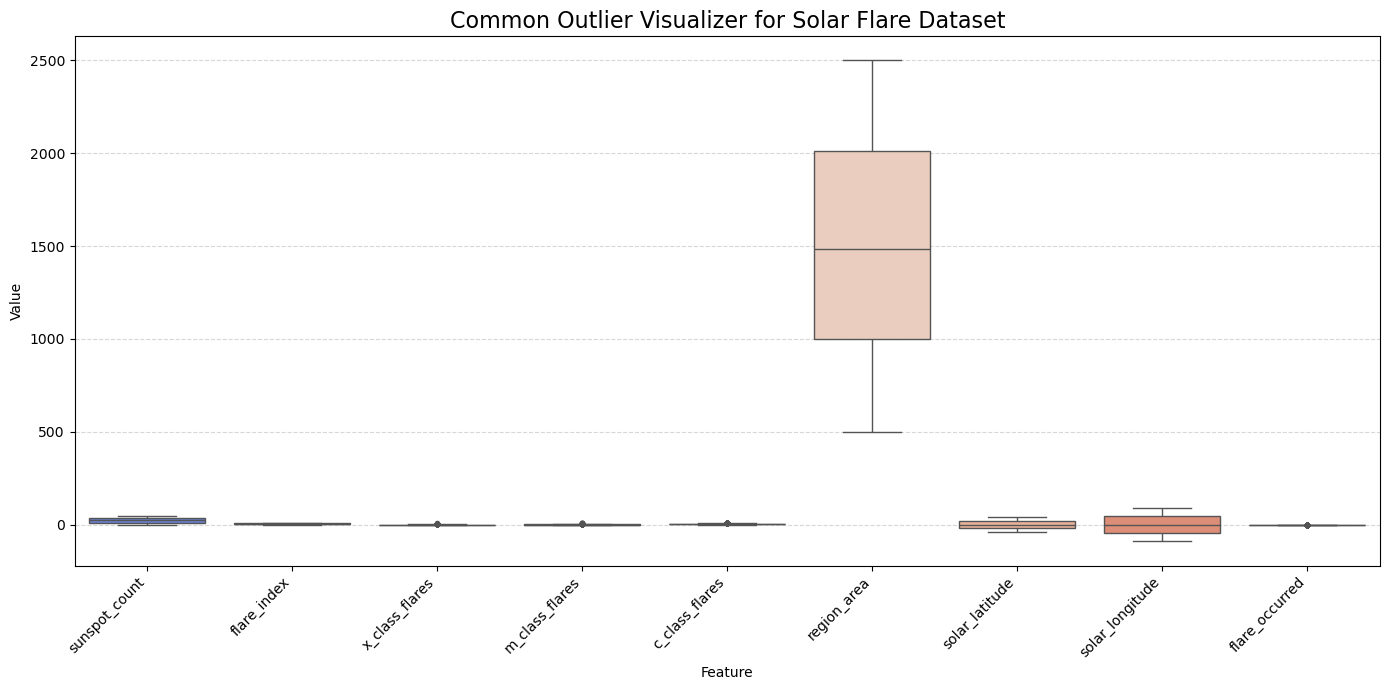

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Melt for Seaborn visualization
melted_df = numeric_df.melt(var_name='Feature', value_name='Value')

# Common Outlier Visualizer (Cox/Box Plot)
plt.figure(figsize=(14,7))
sns.boxplot(x='Feature', y='Value', data=melted_df, palette='coolwarm', fliersize=3)
plt.title("Common Outlier Visualizer for Solar Flare Dataset", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


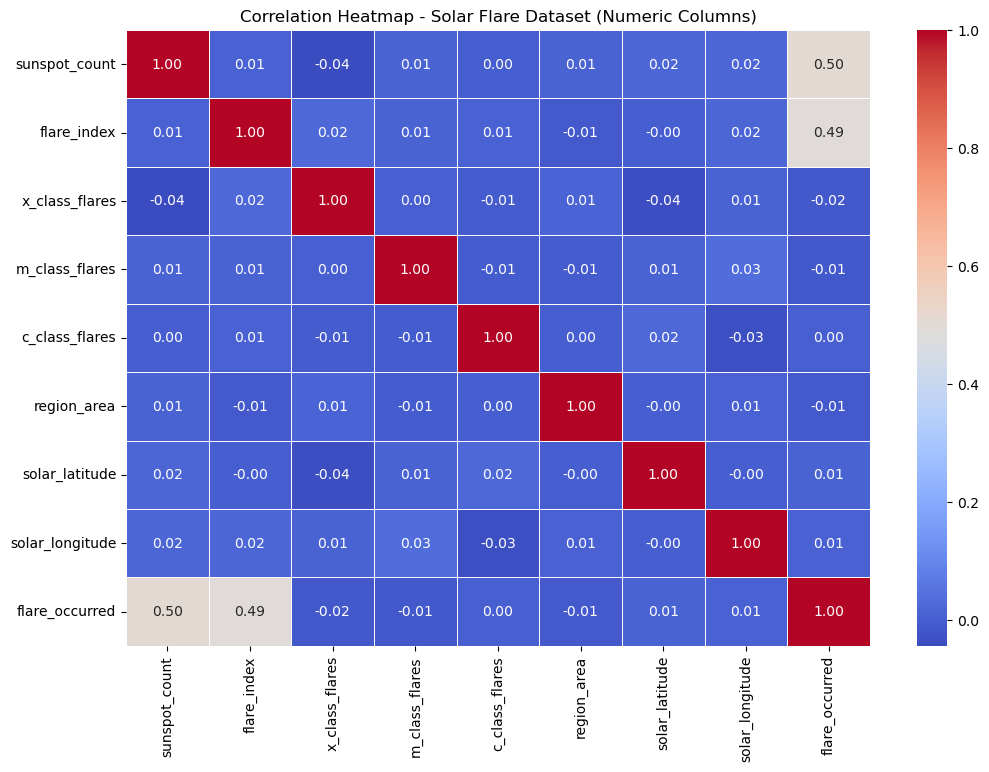

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap - Solar Flare Dataset (Numeric Columns)')
plt.show()
